In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from scipy.stats import pearsonr
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [29]:
data = pd.read_csv('data.csv')

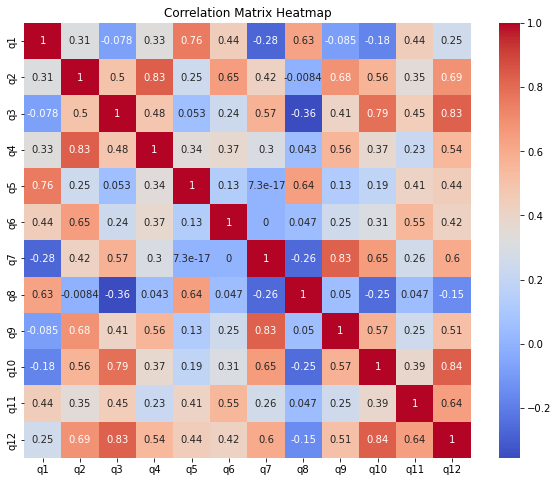

In [30]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
chi_square_value, p_value = calculate_bartlett_sphericity(data)
kmo_all, kmo_model = calculate_kmo(data)

print("Bartlett's test p-value:", p_value)
print("KMO:", kmo_model)

Bartlett's test p-value: nan
KMO: 0.4178701574240153


C:\Users\manoj\AppData\Roaming\Python\Python39\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\manoj\AppData\Roaming\Python\Python39\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [32]:
fa = FactorAnalyzer(n_factors=12, rotation=None)
fa.fit(data)

FactorAnalyzer(n_factors=12, rotation=None, rotation_kwargs={})

In [33]:
ev, v = fa.get_eigenvalues()
total_variance = np.sum(v)
explained_variance = v / total_variance
cumulative_variance = np.cumsum(explained_variance)

explained_variance_table = pd.DataFrame({'Total': ev, '% of variance': explained_variance * 100, 'Accumulated %': cumulative_variance * 100})
print(explained_variance_table)

           Total  % of variance  Accumulated %
0   5.243090e+00      43.855405      43.855405
1   2.798730e+00      23.392500      67.247905
2   1.213487e+00      10.119259      77.367164
3   1.100978e+00       9.178906      86.546070
4   7.066555e-01       5.876164      92.422234
5   4.123137e-01       3.412298      95.834532
6   2.489738e-01       2.044956      97.879488
7   1.806400e-01       1.473955      99.353442
8   6.983187e-02       0.547178      99.900621
9   1.765525e-02       0.109825     100.010446
10  7.643564e-03       0.025745     100.036191
11  3.410905e-16      -0.036191     100.000000


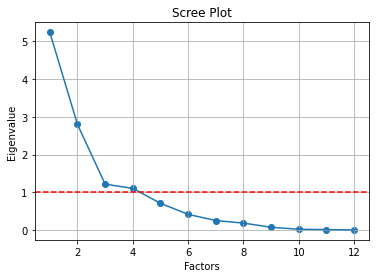

In [34]:
plt.scatter(range(1, data.shape[1] + 1), ev)
plt.plot(range(1, data.shape[1] + 1), ev)
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [35]:
communalities = fa.get_communalities()
print('Communalities:', communalities)

Communalities: [0.99585362 0.99603047 0.99526646 0.99513599 0.99579346 0.99506102
 0.99537278 0.99501659 0.99560153 0.99547889 0.99500924 0.99537996]


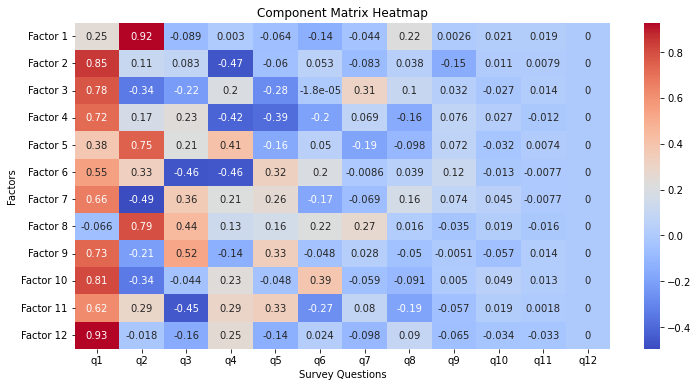

In [36]:
component_matrix = fa.loadings_
plt.figure(figsize=(12, 6))
sns.heatmap(component_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=data.columns, yticklabels=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9', 'Factor 10', 'Factor 11', 'Factor 12'])
plt.title('Component Matrix Heatmap')
plt.xlabel('Survey Questions')
plt.ylabel('Factors')
plt.show()

[[ 0.05045944  0.82466775 -0.25866884  0.45148674]
 [ 0.26372636  0.06917853  0.4807481   0.84406159]
 [ 0.78271412 -0.18827248  0.27826557  0.2162073 ]
 [ 0.21969012  0.16978379  0.40943895  0.57539038]
 [ 0.27752428  0.91362178  0.07341176  0.05296167]
 [ 0.24454064  0.10600782 -0.06047421  0.71548571]
 [ 0.46649362 -0.15682409  0.75009523 -0.05147179]
 [-0.29015616  0.78142127  0.03426494  0.00847885]
 [ 0.18220743  0.03916914  0.92389319  0.27119161]
 [ 0.73874288 -0.11770063  0.44112452  0.16032462]
 [ 0.57063314  0.27567185 -0.02568901  0.31563736]
 [ 0.89461369  0.15186698  0.29465791  0.32562819]]


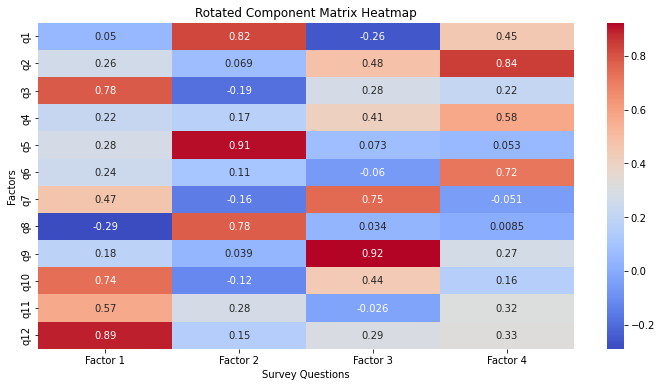

In [37]:
fa_rotated = FactorAnalyzer(n_factors=4, rotation='varimax') # Use 4 factors as an example
fa_rotated.fit(data)
rotated_component_matrix = fa_rotated.loadings_
print(rotated_component_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(rotated_component_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], yticklabels=data.columns)
plt.title('Rotated Component Matrix Heatmap')
plt.xlabel('Survey Questions')
plt.ylabel('Factors')
plt.show()